## Import the libraries

In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import
ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

## Define image properties

In [2]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

## Prepare dataset for training model

In [3]:
filenames=os.listdir("./train")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

## Create the neural net model

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

## Analyzing model

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

## Define callbacks and learning rate

In [6]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

## Manage data

In [7]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

## Training and validation data generator

In [8]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "./train/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_filenames = os.listdir("./test/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

test_generator = train_datagen.flow_from_dataframe(test_df,
                                                 "./test/",x_col='filename',y_col=None,
                                                 target_size=Image_Size,
                                                 class_mode=None,
                                                 batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.
Found 0 validated image filenames belonging to 0 classes.


C:\Users\HARSHA\AppData\Roaming\Python\Python39\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 5000 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Found 12500 validated image filenames.


## Model Training

In [9]:
epochs=10
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10


C:\Users\HARSHA\AppData\Local\Temp\ipykernel_20204\2528005629.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


1333/1333 [==============================] - 423s 317ms/step - loss: 0.7614 - accuracy: 0.6259 - lr: 0.0010
Epoch 2/10
1333/1333 [==============================] - 384s 288ms/step - loss: 0.5740 - accuracy: 0.7076 - lr: 0.0010
Epoch 3/10
1333/1333 [==============================] - 347s 260ms/step - loss: 0.5161 - accuracy: 0.7541 - lr: 0.0010
Epoch 4/10
1333/1333 [==============================] - 337s 252ms/step - loss: 0.4722 - accuracy: 0.7783 - lr: 0.0010
Epoch 5/10
1333/1333 [==============================] - 335s 251ms/step - loss: 0.4494 - accuracy: 0.7953 - lr: 0.0010
Epoch 6/10
1333/1333 [==============================] - 335s 251ms/step - loss: 0.4294 - accuracy: 0.8054 - lr: 0.0010
Epoch 7/10
1333/1333 [==============================] - 324s 243ms/step - loss: 0.4094 - accuracy: 0.8166 - lr: 0.0010
Epoch 8/10
1333/1333 [==============================] - 341s 256ms/step - loss: 0.3998 - accuracy: 0.8211 - lr: 0.0010
Epoch 9/10
1333/1333 [==============================] - 386

## Save the model

In [17]:
model.save("modelnew_catsORdogs_10epoch.h5")

## Test data preparation

In [18]:
test_filenames = os.listdir("./test/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [19]:
test_generator = train_datagen.flow_from_dataframe(test_df,
                                                 "./test/",x_col='filename',y_col=None,
                                                 target_size=Image_Size,
                                                 class_mode=None,
                                                 batch_size=batch_size)

Found 12500 validated image filenames.


## Make categorical prediction

In [20]:
predict = model.predict(test_generator)

## Convert labels to categories

In [21]:
test_df['category'] = np.argmax(predict, axis=-1)
#np.argmax(model.predict(x_test),axis=1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

## Visualize the prediction results

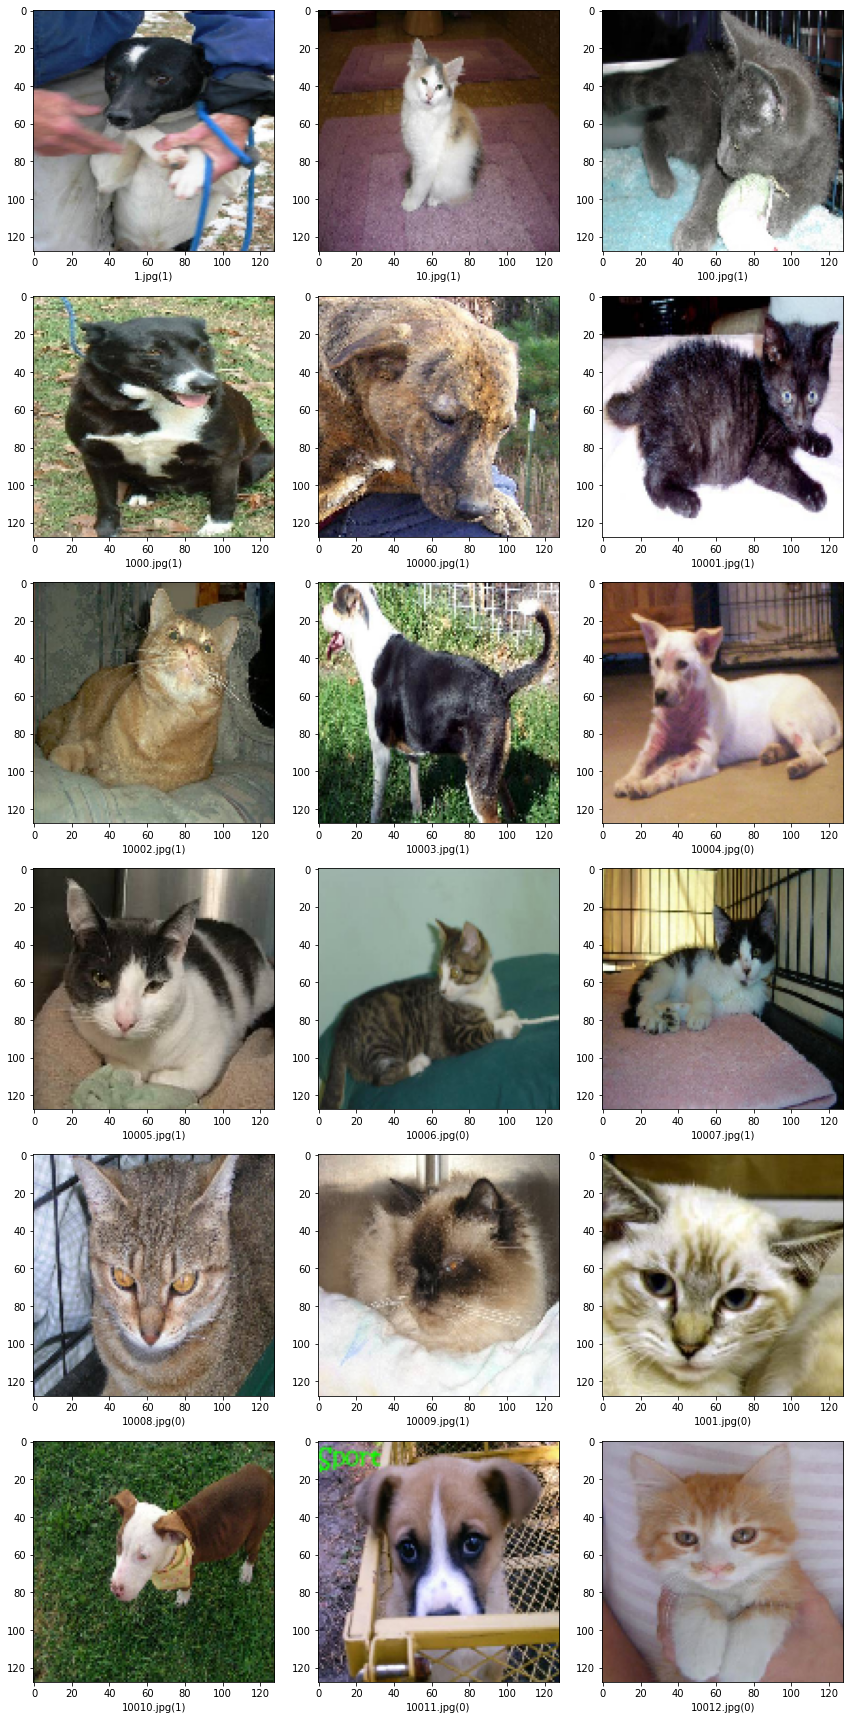

In [22]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("./test/"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

## Test your model performance on custom data

In [23]:
results={
    0:'cat',
    1:'dog'
}
from PIL import Image
import numpy as np
im=Image.open("test2.jpg")
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
#pred=model.predict_classes([im])[0]
predict_x=model.predict([im])[0]
pred=np.argmax(predict_x,axis=-1)
print(pred,results[pred])

1 dog
